In [1]:
import cv2
import numpy as np
#import common

%matplotlib inline
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0) 

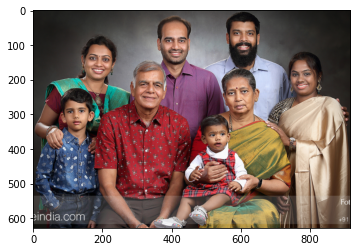

In [2]:
base_image = cv2.imread('/content/family.png')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

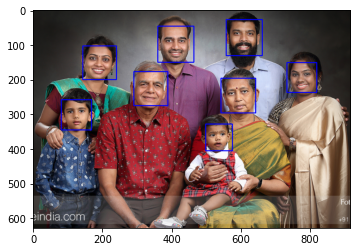

In [3]:
# this is a pre-trained face cascade
test_image = cv2.imread('/content/family.png')
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [4]:
#read images
img = cv2.imread('/content/family.png')
om = cv2.imread('/content/om5.png')

#get shape of om
original_om_h,original_om_w,om_channels = om.shape

#get shape of img
img_h,img_w,img_channels = img.shape

#convert to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
om_gray = cv2.cvtColor(om, cv2.COLOR_BGR2GRAY)

#create mask and inverse mask of om
#Note: I used THRESH_BINARY_INV because my image was already on 
#transparent background, try cv2.THRESH_BINARY if you are using a white background
ret, original_mask = cv2.threshold(om_gray, 10, 255, cv2.THRESH_BINARY_INV)
original_mask_inv = cv2.bitwise_not(original_mask)

#find faces in image using classifier
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

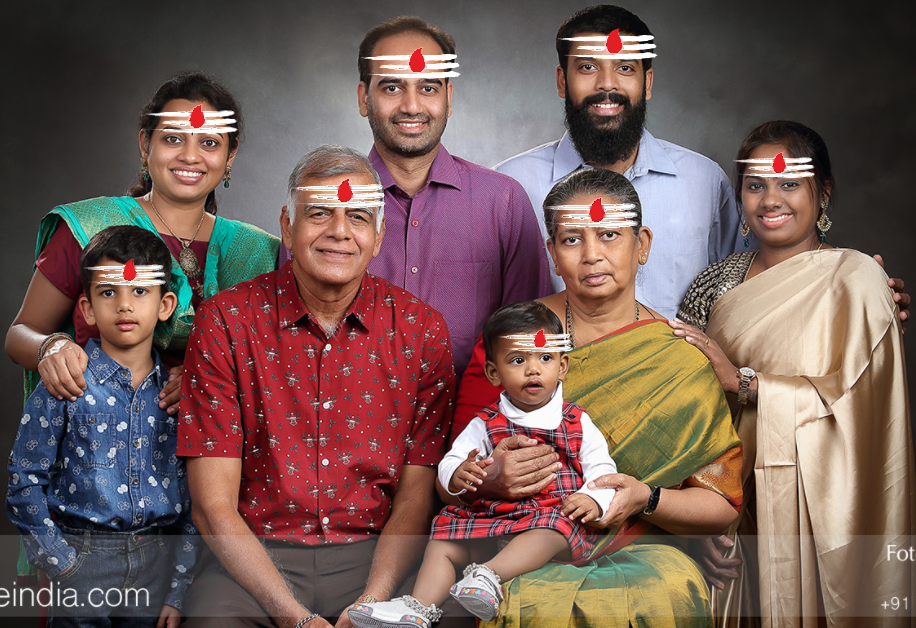

In [5]:
for (x,y,w,h) in faces:
    #retangle for testing purposes
    #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    #coordinates of face region
    face_w = w
    face_h = h
    face_x1 = x
    face_x2 = face_x1 + face_w
    face_y1 = y
    face_y2 = face_y1 + face_h

    #om size in relation to face by scaling
    om_width = int(w)
    om_height = int(h*0.95)
    
    #setting location of coordinates of om
    om_x1 = face_x1
    om_x2 = face_x2
    om_y1 = face_y1
    temp = (int)((int)(face_y2) + (int)(2*face_y1))
    om_y2 = (int)(temp/3) 

    #check to see if out of frame
    if om_x1 < 0:
        om_x1 = 0
    if om_y1 < 0:
        om_y1 = 0
    if om_x2 > img_w:
        om_x2 = img_w
    if om_y2 > img_h:
        om_y2 = img_h

    #Account for any out of frame changes
    om_width = om_x2 - om_x1
    om_height = om_y2 - om_y1

    #resize om to fit on face
    om = cv2.resize(om, (om_width,om_height), interpolation = cv2.INTER_AREA)
    mask = cv2.resize(original_mask, (om_width,om_height), interpolation = cv2.INTER_AREA)
    mask_inv = cv2.resize(original_mask_inv, (om_width,om_height), interpolation = cv2.INTER_AREA)

    #take ROI for om from background that is equal to size of om image
    roi = img[om_y1:om_y2, om_x1:om_x2]

    #original image in background (bg) where om is not present
    roi_bg = cv2.bitwise_and(roi,roi,mask = mask)
    roi_fg = cv2.bitwise_and(om,om,mask=mask_inv)
    dst = cv2.add(roi_bg,roi_fg)

    #put back in original image
    img[om_y1:om_y2, om_x1:om_x2] = dst


from google.colab.patches import cv2_imshow
cv2_imshow(img)#display image
cv2.waitKey(0) #wait until key is pressed to proceed
cv2.destroyAllWindows() #close all windows